In [2]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

In [3]:
xx=np.array([-0.51,51.2])
yy=np.array([0.33,51.6])
means=[xx.mean(),yy.mean()]
stds=[xx.std()/3,yy.std()/3]
corr=0.8
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000).T

In [4]:
df=pd.DataFrame()

In [5]:
df['exp(in months)']=m[0]
df['salary(in thousands)']=m[1]

In [6]:
df.head()

,exp(in months),salary(in thousands)
0,38.786395,34.484511
1,11.942380,10.747582
2,41.565266,39.316588
3,20.893429,26.447508
4,38.365854,39.419033


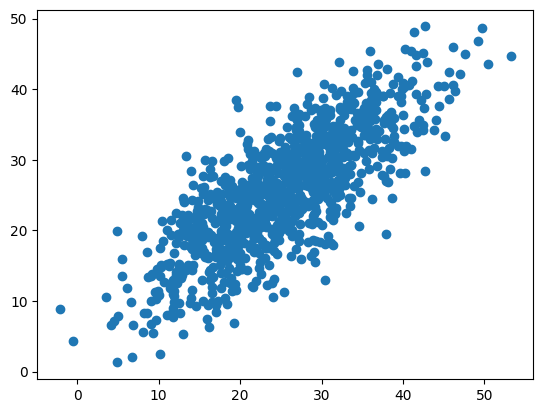

In [7]:
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])

In [8]:
x=df.iloc[:,0:1].values
y=df.iloc[:,1].values
x.shape
y.shape

(1000,)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [10]:
x_train.shape

(800, 1)

In [11]:
x_test.shape


(200, 1)

In [12]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [13]:
regressor.fit(x_train,y_train)


LinearRegression()

In [14]:
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)

LinearRegression(normalize=False)

In [15]:
y_pred=regressor.predict(x_test)

In [16]:
print(regressor.coef_[0])
print(regressor.intercept_)

0.7650663239077934
6.527839788866363


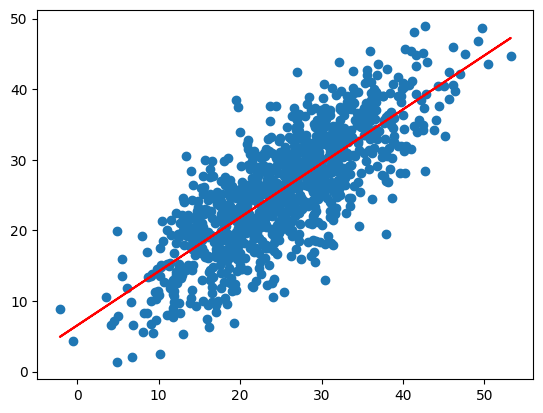

In [17]:
plt.plot(x_train,regressor.predict(x_train), color='red')
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])

linear regression on non linear dataset

In [18]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
data= pd.read_csv("FuelConsumption.csv")

In [20]:
data=data[['FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
data.rename(columns={'FUELCONSUMPTION_COMB_MPG':'comubstion','CO2EMISSIONS':'emission'},inplace=True)

In [44]:
data.head()

,comubstion,emission
0,33,196
1,29,221
2,48,136
3,25,255
4,27,244


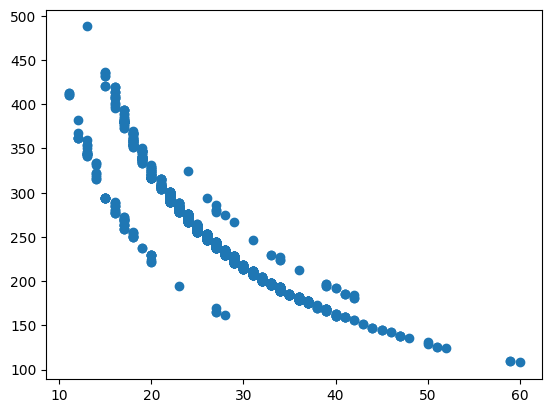

In [45]:
plt.scatter(data.comubstion,data.emission)

In [72]:
x1=data.iloc[:,0:1].values
y1=data.iloc[:,-1].values

In [73]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)


In [74]:
L=LinearRegression()

In [75]:
L.fit(x1_train,y1_train)

LinearRegression()

In [76]:
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)

LinearRegression(normalize=False)

In [77]:
y1_pred=L.predict(x1_test)

In [78]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 Score",r2_score(y1_test,y1_pred))
print("RMSE Score",np.sqrt(mean_squared_error(y1_test,y1_pred)))


R2 Score 0.8089218353059167
RMSE Score 28.19055709805378


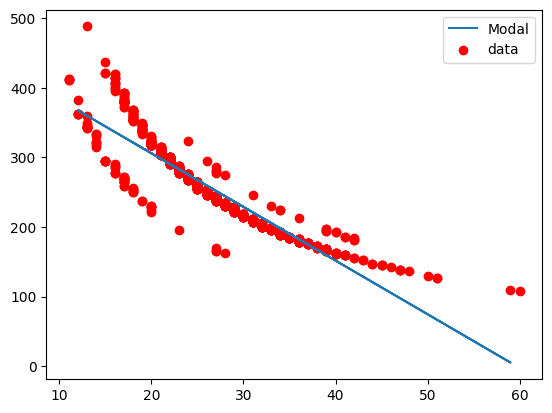

In [79]:
plt.plot(x1_test,L.predict(x1_test),label="Modal")
plt.scatter(x1_train,y1_train,label="data", color="r")
plt.legend()
plt.show()

polynonial regression

In [80]:
from sklearn.preprocessing import PolynomialFeatures

In [81]:
poly=PolynomialFeatures(degree=2)

In [82]:
x_poly=poly.fit_transform(x1_train)
print(x_poly.shape)

(853, 3)


In [83]:
L1=LinearRegression()
L1.fit(x_poly,y1_train)

LinearRegression()

In [84]:
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)

LinearRegression(normalize=False)

In [86]:
x1_test_poly=poly.fit_transform(x1_test)

In [89]:
y1_pred=L1.predict(x1_test_poly)

In [90]:
print("R2 Score",r2_score(y1_test,y1_pred))
print("RMSE Score",np.sqrt(mean_squared_error(y1_test,y1_pred)))

R2 Score 0.8476584662614027
RMSE Score 25.17139527816025


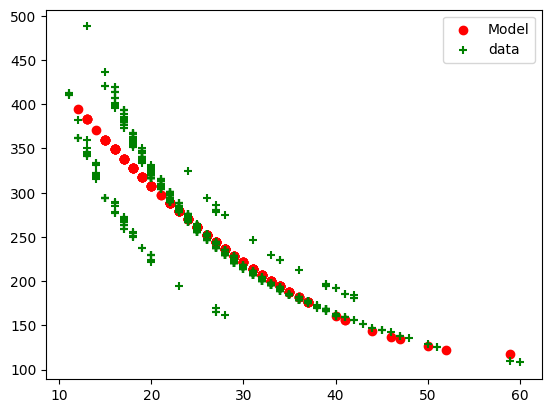

In [93]:
plt.scatter(x1_test,y1_pred, label="Model",color='red')
plt.scatter(x1_train, y1_train, label="data", marker='+',color='green')
#plt.scatter(X,y,label="Training data")
plt.legend()
plt.show()
 